# Exploratory Data Analysis: Spotify Listening

As both an avid Spotify user and a lover of all-things-data, I have always wanted to deep-dive into my own listening habits via data science. Were there any patterns that I had never noticed? Does my streaming data match how I personally feel about my music taste? What kind of listener am I?

In order to explore who I was as a music listener, I requested the available data for my personal Spotify account. The following notebook follows through my process of exploratory data analysis, with particular focus on my streaming history.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import time
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Loading the dataset

In [5]:
def load_streaming_data(src):
    """
    Returns a Pandas DataFrame object with the current listening history 
    from Spotify data pull. The src argument is the folder in which the data is stored.
    """
    with open(f'../data/personal/{src}/StreamingHistory0.json') as file:
        data = json.load(file)
    with open(f'../data/personal/{src}/StreamingHistory0.json') as file:
        data1 = json.load(file)
        
    df0 = pd.DataFrame(data)
    df1 = pd.DataFrame(data1)
    df = df0.append(df1, ignore_index=True)
    df['secPlayed'] = round(df['msPlayed'] / 1000, 1)
    df = df.drop(columns=['msPlayed'])

    STRTIME_FORMAT = '%Y-%m-%d %H:%M'
    df['endTime'] = pd.to_datetime(df['endTime'], format=STRTIME_FORMAT)
    
    return df

In [6]:
df = load_streaming_data("summer20")

In [7]:
print('INFORMATION ABOUT DATA: \n') 
print(df.info())
df.head()

INFORMATION ABOUT DATA: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
endTime       20000 non-null datetime64[ns]
artistName    20000 non-null object
trackName     20000 non-null object
secPlayed     20000 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 625.1+ KB
None


,endTime,artistName,trackName,secPlayed
0,2019-05-31 02:20:00,Denzel Curry,Envy Me,39.7
1,2019-05-31 02:21:00,Calboy,Envy Me,96.7
2,2019-05-31 02:21:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",2.7
3,2019-05-31 02:26:00,Calboy,Envy Me,120.1
4,2019-05-31 02:29:00,Calboy,Envy Me,112.1


## General Exploratory Data Analysis

### Daily Listening Time

In [8]:
daily = df.groupby(pd.Grouper(key='endTime', freq='D')).sum()
daily['minPlayed'] = daily['secPlayed'] / 60

In [9]:
# Showing elementary statistics
daily.describe()

,secPlayed,minPlayed
count,197.000000,197.000000
mean,15970.334010,266.172234
std,9947.509079,165.791818
min,0.000000,0.000000
25%,8527.400000,142.123333
50%,14660.000000,244.333333
75%,22701.600000,378.360000
max,47410.800000,790.180000


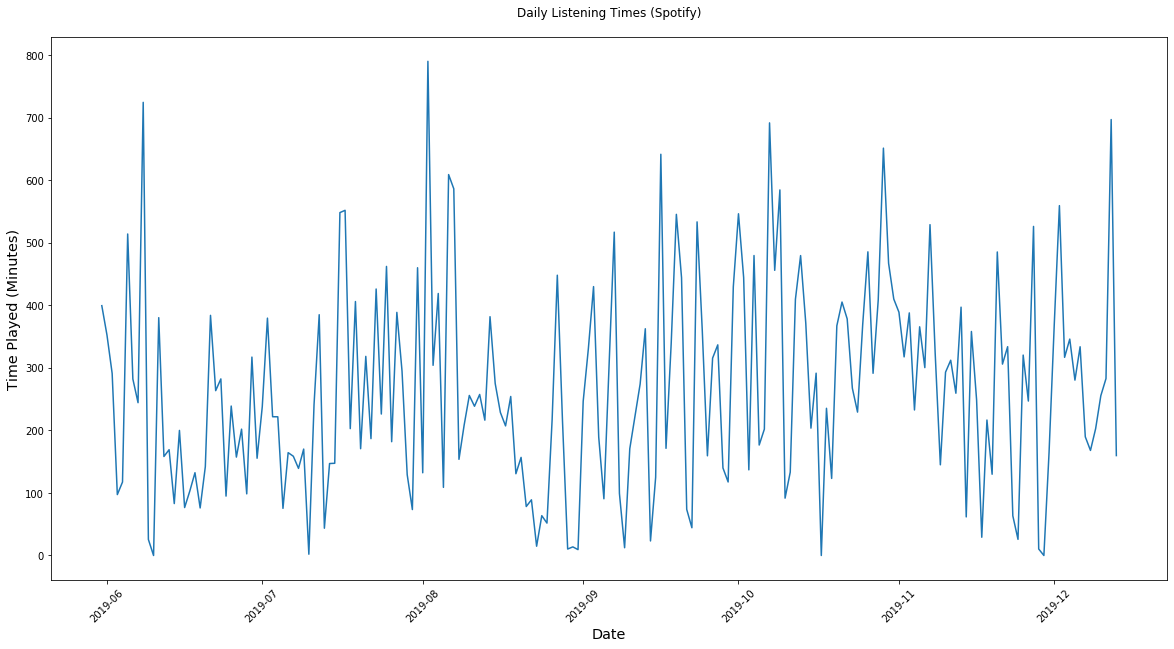

In [10]:
plt.figure(figsize=(20,10))
sns.lineplot(x=daily.index, y='minPlayed', data=daily)
plt.xticks(rotation=45);
plt.xlabel('Date', fontsize='x-large')
plt.ylabel('Time Played (Minutes)', fontsize='x-large')
plt.title('Daily Listening Times (Spotify)', pad=20);
#plt.savefig('daily_listening', bbox_inches='tight', dpi=300);

### Monthly Listening Time

In [11]:
weekly = df.groupby(pd.Grouper(key='endTime', freq='W-MON')).sum()
weekly['hrPlayed'] = weekly['secPlayed'] / 3600

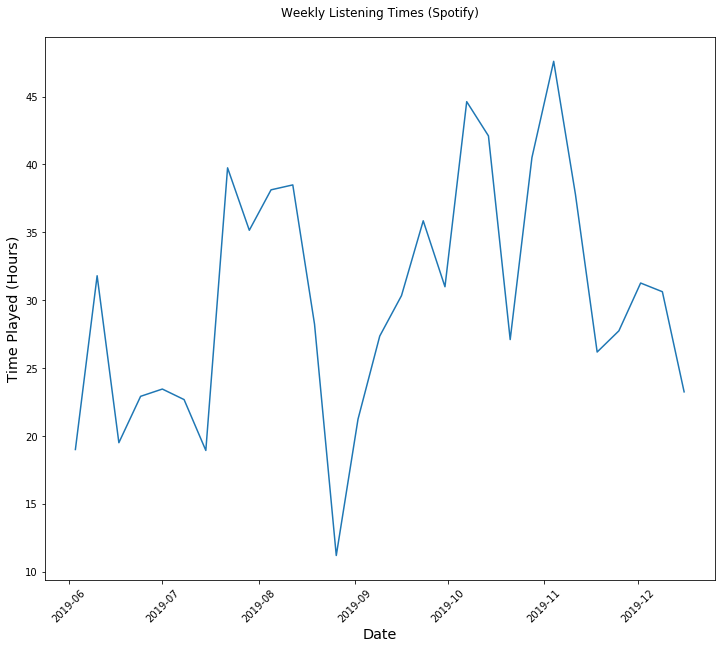

In [12]:
plt.figure(figsize=(12,10))
sns.lineplot(x=weekly.index, y='hrPlayed', data=weekly)
plt.xticks(rotation=45);
plt.xlabel('Date', fontsize='x-large')
plt.ylabel('Time Played (Hours)', fontsize='x-large')
plt.title('Weekly Listening Times (Spotify)', pad=20);
#plt.savefig('weekly_listening', bbox_inches='tight', dpi=300)

When was the highest peak in the chart above? Somewhere between March 2020 and May 2020. Let's find out the exact week!

In [13]:
weekly['hrPlayed'].sort_values(ascending=False).head(1)

endTime
2019-11-04    47.5985
Name: hrPlayed, dtype: float64

It looks like during the week of April 6th `2020-04-06` I played a total of `35.436806` hours of music and podcasts!

# Podcast Analysis

Since (at the time of downloading this data) the music and podcast listening history is not separate, it is necessary to make this distinction in order to perform EDA on each separately.

In [23]:
### Below is a list of all the artists who made podcasts

PODCAST_ARTISTS = ['VIEWS with David Dobrik and Jason Nash', 'The California Golden Bearcast', 
                 'Whiskey Ginger w/ Andrew Santino', 'The Tiny Meat Gang Podcast',
                 'Stuff You Should Know','Patriots Unfiltered','Cal Rivals Excellent Podcast Experience',
                 'Curious with Josh Peck','Locked On Patriots - Daily Podcast On The New England Patriots',
                 'Skotcast with Jeff Wittek & Scotty Sire','Anything Goes with Emma Chamberlain',
                 'Call Her Daddy', 'Office Ladies', 'That Made All the Difference','Pardon My Take', 
                  'My Favorite Theorem', 'The James Altucher Show', 'Zane and Heath: Unfiltered',
                   'With Authority','The Numberphile Podcast', 'Billionaires Getting Interviewed',
                  'Elon Musk Interviews','Cover 3 College Football Podcast']

In [24]:
podcasts = df[df['artistName'].isin(PODCAST_ARTISTS)].reset_index(drop=True)
print('INFORMATION ABOUT PODCASTS: \n') 
print(podcasts.info())
podcasts.head()

INFORMATION ABOUT PODCASTS: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 4 columns):
endTime       954 non-null datetime64[ns]
artistName    954 non-null object
trackName     954 non-null object
secPlayed     954 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 29.9+ KB
None


,endTime,artistName,trackName,secPlayed
0,2019-05-31 02:21:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",2.7
1,2019-05-31 02:42:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",657.7
2,2019-05-31 03:36:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",299.0
3,2019-05-31 12:26:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",2118.2
4,2019-05-31 12:53:00,VIEWS with David Dobrik and Jason Nash,Teaser Episode,8.6


In [25]:
podcasts_top_10 = podcasts.groupby('artistName').sum().sort_values('secPlayed', ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 Podcasts (Listening Time)')

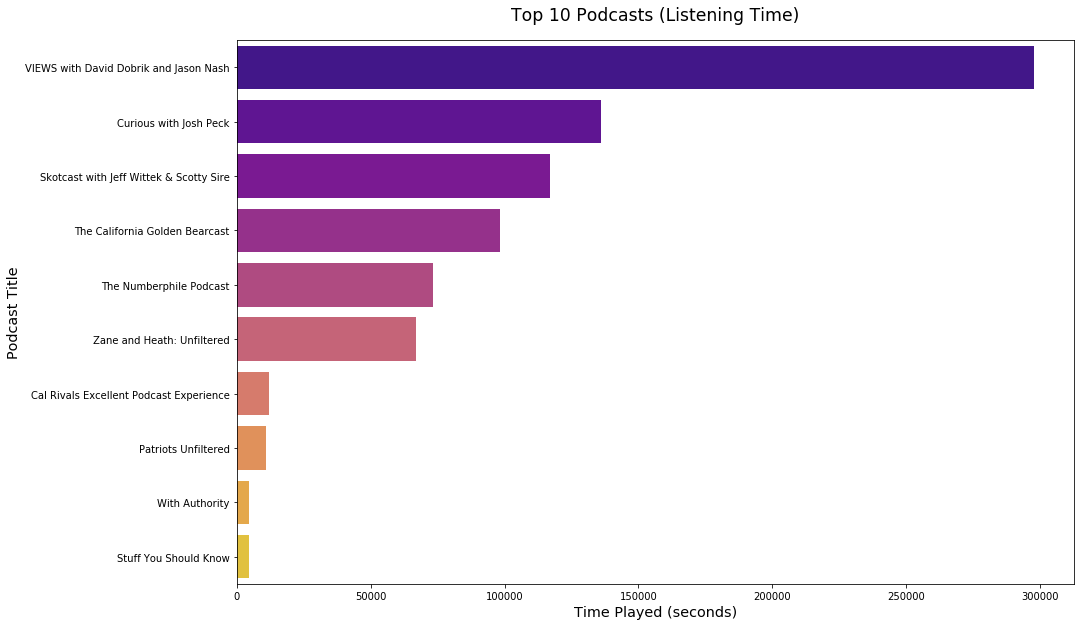

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='secPlayed', y=podcasts_top_10.index, data=podcasts_top_10, orient='h', palette='plasma')
plt.xlabel('Time Played (seconds)', fontsize='x-large')
plt.ylabel('Podcast Title', fontsize='x-large')
plt.title('Top 10 Podcasts (Listening Time)', pad=20, fontsize='xx-large')
#plt.savefig('top_10_podcasts', bbox_inches='tight', dpi=300)

### Views with David Dobrik and Jason Nash

The most popular podcast that I listen to. In order to perform EDA on the music side of things, I will have to separate all podcasts (including this one).

In [14]:
views_podcast = df[df['artistName'] == 'VIEWS with David Dobrik and Jason Nash']
views_podcast.head()

,endTime,artistName,trackName,secPlayed
2,2019-05-31 02:21:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",2.7
5,2019-05-31 02:42:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",657.7
15,2019-05-31 03:36:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",299.0
16,2019-05-31 12:26:00,VIEWS with David Dobrik and Jason Nash,"$10,000 for Jason’s Kids",2118.2
17,2019-05-31 12:53:00,VIEWS with David Dobrik and Jason Nash,Teaser Episode,8.6


In [15]:
views_top_15 = views_podcast.groupby('trackName').sum().sort_values('secPlayed', ascending=False)[:15]

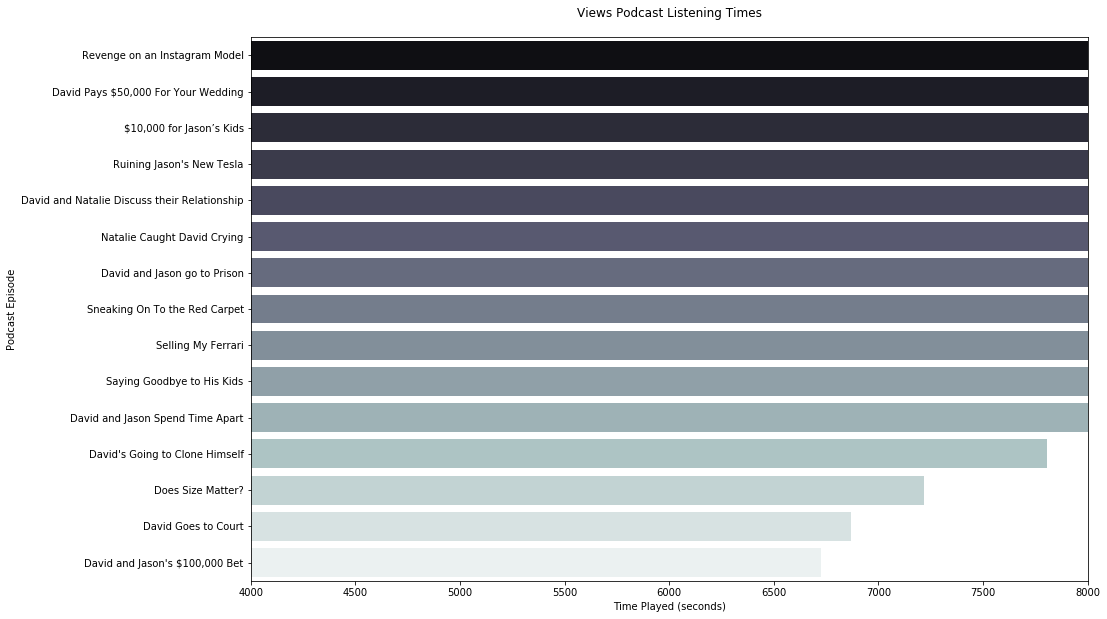

In [16]:
### Horizontal Bar Chart Showing distributed listening time of the Views Podcast 
### broken down into the top fifteen episodes

plt.figure(figsize=(15,10))
plt.xlim(4000,8000)
sns.barplot(x='secPlayed', y=views_top_15.index, data=views_top_15, orient='h', palette='bone')
plt.xlabel('Time Played (seconds)')
plt.ylabel('Podcast Episode')
plt.title('Views Podcast Listening Times', pad=20);
#plt.savefig('views_listening', bbox_inches='tight', dpi=500)

### The Numberphile Podcast

Another podcast that I listen to quite a bit...

In [17]:
numberphile_podcast = df[df['artistName'] == 'The Numberphile Podcast']
numberphile_podcast.head()

,endTime,artistName,trackName,secPlayed
152,2019-06-01 20:56:00,The Numberphile Podcast,The Singing Banana - with James Grime,2.7
154,2019-06-01 21:16:00,The Numberphile Podcast,The Offensive Lineman - with John Urschel,1221.8
159,2019-06-01 21:45:00,The Numberphile Podcast,The Offensive Lineman - with John Urschel,917.1
160,2019-06-02 02:05:00,The Numberphile Podcast,The Offensive Lineman - with John Urschel,240.8
161,2019-06-02 02:42:00,The Numberphile Podcast,The Offensive Lineman - with John Urschel,31.3


In [18]:
numberphile_top_15 = numberphile_podcast.groupby('trackName').sum().sort_values('secPlayed', ascending=False)[:15]
numberphile_top_15

,secPlayed
trackName,
Fame and Admiration - with Timothy Gowers,17346.4
Coffin Problems - with Edward Frenkel,9077.8
The C-Word - talking Calculus with Steven Strogatz,7713.2
Fermat’s Last Theorem - with Ken Ribet,6516.0
The Klein Bottle Guy - with Cliff Stoll,6402.4
The Number Collector - with Neil Sloane,5773.2
The Singing Banana - with James Grime,5744.0
The Badly Behaved Prime - with James Maynard,5057.0
The Offensive Lineman - with John Urschel,4954.6


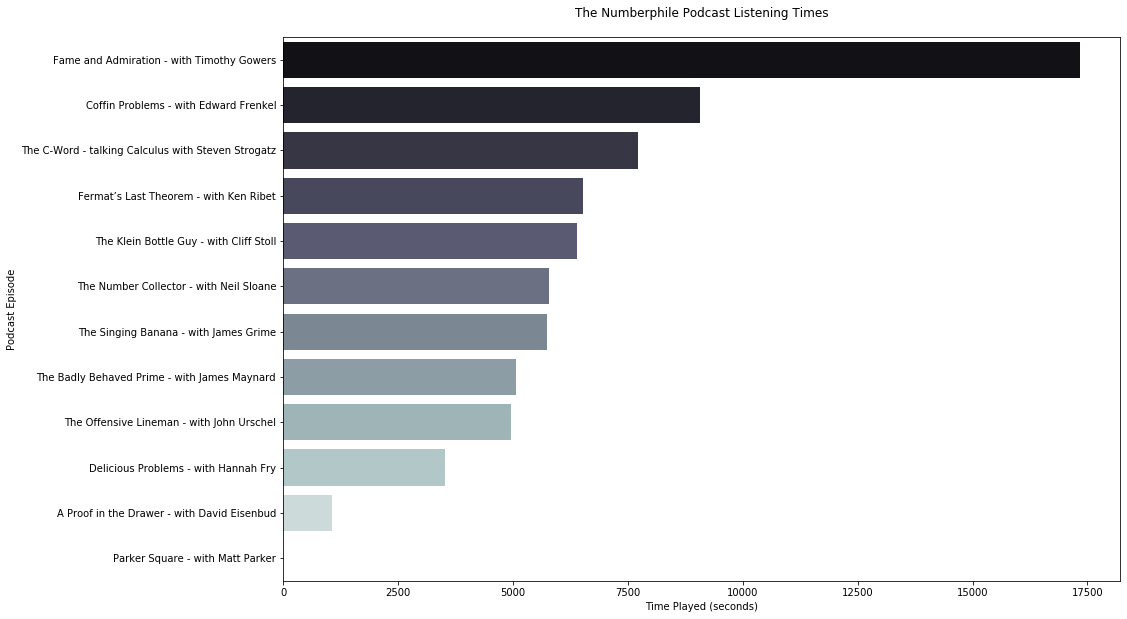

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x='secPlayed', y=numberphile_top_15.index, data=numberphile_top_15, orient='h', palette='bone')
plt.xlabel('Time Played (seconds)')
plt.ylabel('Podcast Episode')
plt.title('The Numberphile Podcast Listening Times', pad=20);
#plt.savefig('numberphile_listening', bbox_inches='tight', dpi=500)

In order to isolate the podcasts, we must group by the average time played for each artist in order to find the longer forms of media (i.e. podcasts, talk shows). From there, we must manually investigate to find all the artists within the `artistName` column that correspond to Podcasts.

In [20]:
df.groupby('artistName').mean().sort_values('secPlayed', ascending=False).head(25)

,secPlayed
artistName,
With Authority,2290.800000
Stuff You Should Know,2246.100000
The California Golden Bearcast,1693.044828
Nature Sounds,1194.428571
Patriots Unfiltered,1086.920000
That Made All the Difference,1029.900000
Office Ladies,1019.450000
Cal Rivals Excellent Podcast Experience,1006.650000
Curious with Josh Peck,985.233333


# Music Analysis

### Loading the DataFrame

In [27]:
WHITE_NOISE = ['Nature Sounds', 'Sounds Of Nature : Thunderstorm, Rain','Calmsound']

In [28]:
music = df[~df['artistName'].isin(PODCAST_ARTISTS + WHITE_NOISE)]
print('INFORMATION ABOUT MUSIC DATAFRAME: \n')
print(music.info())
music.head()

INFORMATION ABOUT MUSIC DATAFRAME: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 0 to 19999
Data columns (total 4 columns):
endTime       19032 non-null datetime64[ns]
artistName    19032 non-null object
trackName     19032 non-null object
secPlayed     19032 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 743.4+ KB
None


,endTime,artistName,trackName,secPlayed
0,2019-05-31 02:20:00,Denzel Curry,Envy Me,39.7
1,2019-05-31 02:21:00,Calboy,Envy Me,96.7
3,2019-05-31 02:26:00,Calboy,Envy Me,120.1
4,2019-05-31 02:29:00,Calboy,Envy Me,112.1
6,2019-05-31 03:15:00,Calboy,Envy Me,117.8


In [29]:
music[music['trackName'].str.contains('rain', case=False)]

,endTime,artistName,trackName,secPlayed
72,2019-06-01 00:14:00,Field Medic,how come i see you in the rain?,64.1
2605,2019-08-01 01:11:00,Pitbull,Rain Over Me (feat. Marc Anthony),130.1
2805,2019-08-02 15:49:00,Pitbull,Rain Over Me (feat. Marc Anthony),231.6
2956,2019-08-03 13:24:00,Pitbull,Rain Over Me (feat. Marc Anthony),231.6
3327,2019-08-07 17:04:00,Kacey Musgraves,Rainbow,30.6
...,...,...,...,...
19075,2019-11-25 06:10:00,Rain Recordings,Forest Rain,170.0
19076,2019-11-25 06:11:00,Factorial FX,Rain Droplets,99.8
19673,2019-12-09 18:18:00,Adele,Set Fire to the Rain,3.5
19675,2019-12-09 18:26:00,Adele,Set Fire to the Rain,241.7


In [30]:
for i in music.groupby('trackName').sum().sort_values('secPlayed', ascending=False).index[:10]:
    print(i)

Sacrifices (with EARTHGANG & J. Cole feat. Smino & Saba)
Piano Sonata No. 14 in C-Sharp Minor, Op. 27 No. 2 "Moonlight": I. Adagio sostenuto
The Lark Ascending
Me Odias?
Callaita
So Free
Break My Heart Again
Bailar
I DON'T CARE
SLOW DANCING IN THE DARK


### Most Listened To Artists

In [51]:
music_top_10 = music.groupby('artistName').sum().sort_values('secPlayed', ascending=False)[:10]

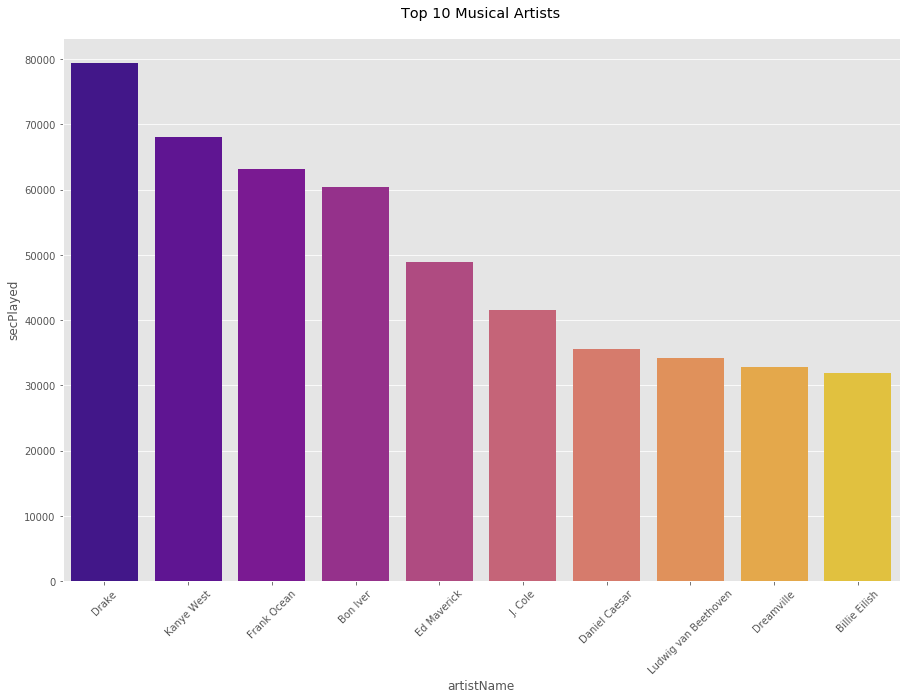

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=music_top_10.index, y='secPlayed', data=music_top_10, palette='plasma')
plt.xticks(rotation=45);
plt.title('Top 10 Musical Artists',pad=20);

### Drake vs. Billie Eilish: A/B Testing

Is the difference in average listening time for either artist statistically significant? By performing a hypothesis test, we can find out!

In [53]:
drake_billie = music[music['artistName'].isin(['Drake','Billie Eilish'])]

#Individual tables for plotting purposes
drake, billie = music[music['artistName'] == 'Drake'], music[music['artistName'] == 'Billie Eilish']
drake_billie.head()

,endTime,artistName,trackName,secPlayed
12,2019-05-31 03:26:00,Billie Eilish,watch,177.5
39,2019-05-31 13:55:00,Drake,Survival,23.2
58,2019-05-31 20:21:00,Billie Eilish,xanny,55.0
101,2019-06-01 17:24:00,Billie Eilish,when the party's over,15.6
103,2019-06-01 17:24:00,Drake,Get It Together,4.3


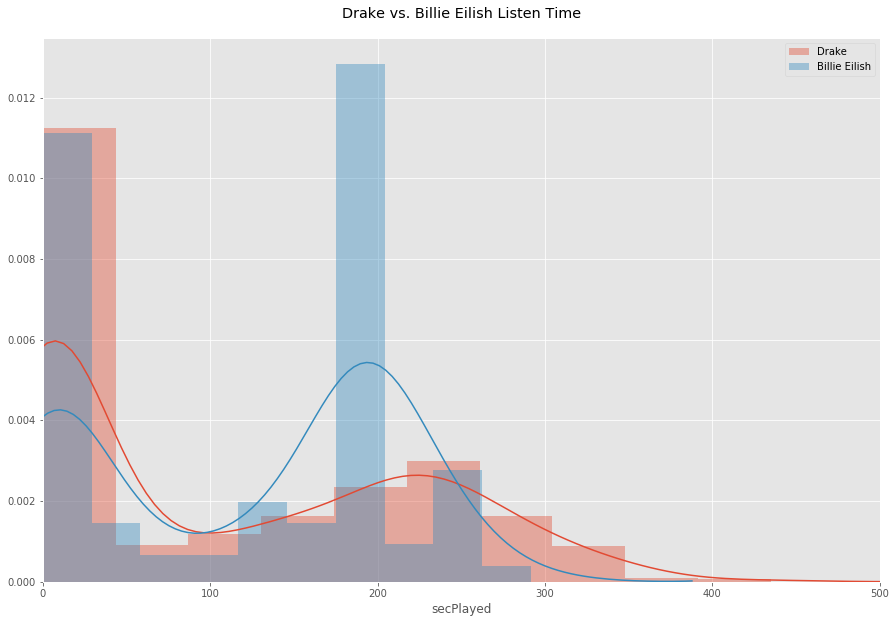

In [54]:
### Plotting distributions of play time of each play of Drake, Billie Eilish

plt.figure(figsize=(15,10))
sns.distplot(drake['secPlayed'], bins=10, label='Drake')
sns.distplot(billie['secPlayed'], bins=10, label='Billie Eilish')
plt.xlim(0,500)
plt.title('Drake vs. Billie Eilish Listen Time', pad=20)
plt.legend();

### Hypothesis Definitions

**Null Hypothesis:** The average listening times of both Drake and Billie Eilish come from the same underlying distribution; any difference is due to random chance.

**Alternative Hypothesis:** The average listening times of hoth Drake and Billie Eilish come from *different* underlying distributions.

**Test Statistic:** Difference of means between average listen time of Drake and Billie Eilish.

In [56]:
ORIGINAL_TEST_STAT = calculate_ts(drake_billie, 'artistName', 'secPlayed')
print('The Original Test Statistic is: {}'.format(ORIGINAL_TEST_STAT))

The Original Test Statistic is: 14.85


In [55]:
def calculate_ts(df, group_label, col_label):
    """Calculates the desired test statistic given a grouping label and a column label"""
    grouped_df = df.groupby(group_label).mean()
    test_stat = round(grouped_df[col_label][0]-grouped_df[col_label][1], 2)
    return test_stat

def shuffle_table(df,col_label):
    """Shuffles a given DataFrame in a random order based on the given column label"""
    new_df = df.copy()
    shuffled_df = new_df.sample(frac=1, replace=False).reset_index(drop=True)
    shuffled_labels = shuffled_df[col_label]
    new_df[col_label] = list(shuffled_labels)
    return new_df

def do_ab_test(df, group_label, col_label):
    """Performs a permutation test and returns one single test statistic"""
    shuffled = shuffle_table(df, col_label)
    test_stat = calculate_ts(shuffled, group_label, col_label)
    return test_stat

def do_all_analysis():
    """Performs all above functions in order to conclude statistical significance"""
    list_ts = []
    for _ in range(1000):
        list_ts.append(do_ab_test(drake_billie, 'artistName', 'secPlayed'))

    p_val = sum(list_ts >= ORIGINAL_TEST_STAT) / len(list_ts)
    print('P-Value: \n', p_val, '\n')

    if p_val <= 0.05:
        print('Conclusion: \n Statistically significant')
        print(' The data favor the alternative hypothesis')
    else:
        print('Conclusion: \n Not statistically significant')
        print('  The data favor the null hypothesis')
    
    plt.figure(figsize=(15,10))
    sns.distplot(list_ts)
    plt.vlines(ORIGINAL_TEST_STAT,0, 0.07,color='blue',linestyles='dashed',label='Observed Test Statistic')
    plt.title('Distribution of Test Statistic',pad=20)
    plt.legend(loc='upper left');

P-Value: 
 0.024 

Conclusion: 
 Statistically significant
 The data favor the alternative hypothesis


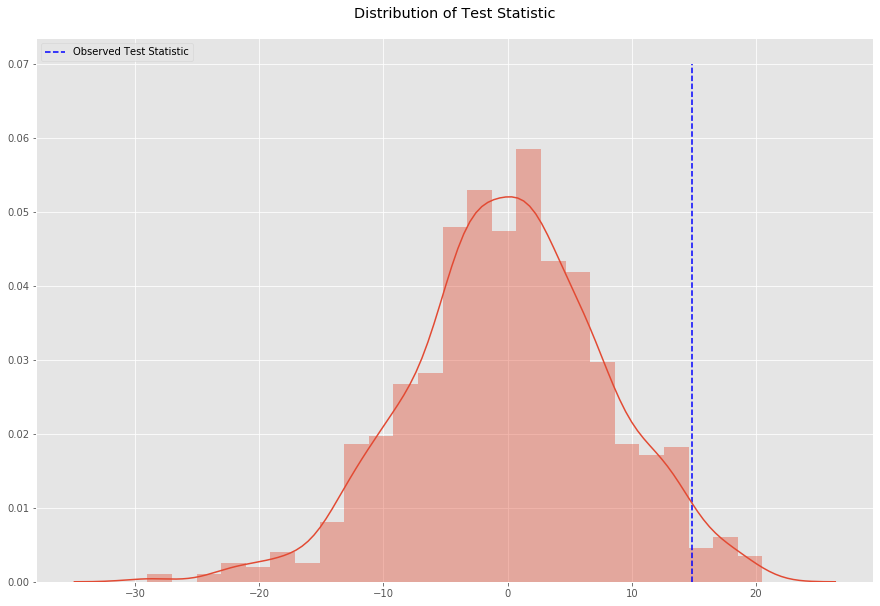

In [57]:
do_all_analysis()

### Top Songs of 2020 (so far)

In [71]:
### Reduced the table to only include streams from 2020

twenty_twenty = music.iloc[10085:].reset_index(drop=True)
twenty_twenty['minPlayed'] = twenty_twenty['secPlayed'] / 60
print('INFORMATION ABOUT 2020 DATAFRAME: \n') 
print(twenty_twenty.info())
twenty_twenty.head()

INFORMATION ABOUT 2020 DATAFRAME: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7016 entries, 0 to 7015
Data columns (total 5 columns):
endTime       7016 non-null datetime64[ns]
artistName    7016 non-null object
trackName     7016 non-null object
secPlayed     7016 non-null float64
minPlayed     7016 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 274.2+ KB
None


,endTime,artistName,trackName,secPlayed,minPlayed
0,2020-01-02 22:01:00,Rae Sremmurd,No Type,31.2,0.520000
1,2020-01-02 22:04:00,Kendrick Lamar,DNA.,185.9,3.098333
2,2020-01-02 22:10:00,Kanye West,POWER,292.1,4.868333
3,2020-01-02 22:14:00,Chance the Rapper,No Problem (feat. Lil Wayne & 2 Chainz),212.8,3.546667
4,2020-01-02 22:18:00,Travis Scott,Antidote,262.7,4.378333


In [72]:
top_20_of_2020 = twenty_twenty.groupby('trackName').sum().sort_values('minPlayed', ascending=False).head(20)

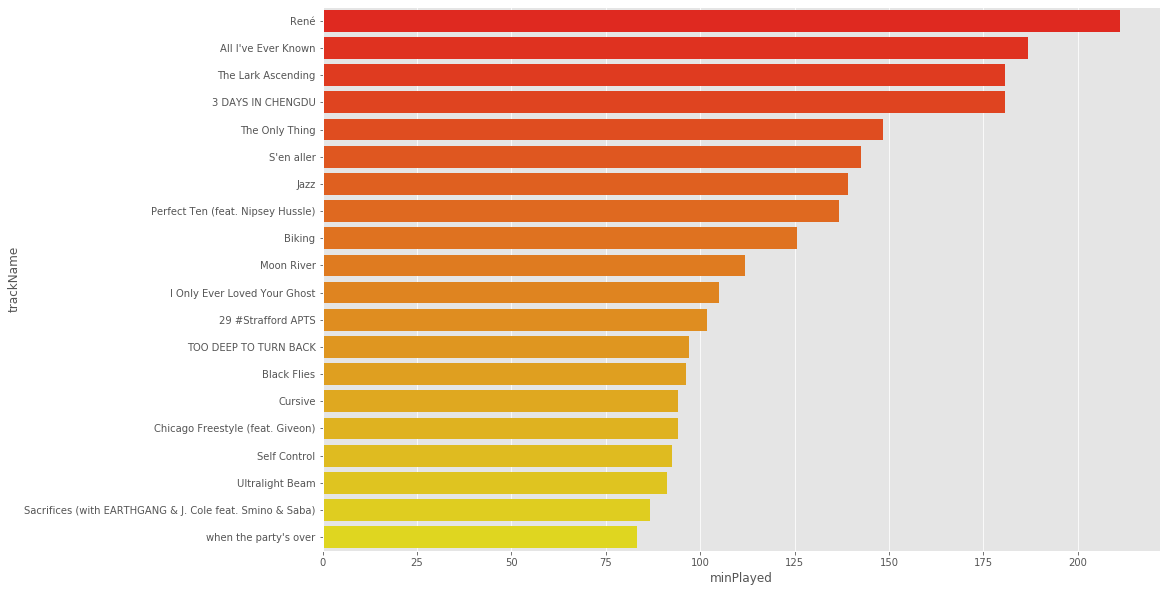

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(x='minPlayed', y=top_20_of_2020.index, data=top_20_of_2020, palette='autumn');

In [80]:
longest_songs = music.groupby(['trackName','artistName']).max().sort_values('secPlayed', ascending=False)
longest_songs.head()

,,endTime,secPlayed
trackName,artistName,,
The Lark Ascending,Ralph Vaughan Williams,2020-05-11 15:10:00,1327.2
"Symphony No. 4 in E-Flat Major, WAB 104, ""Romantic"": I. Bewegt, nicht zu schnell - Live",Anton Bruckner,2019-12-15 01:15:00,1150.2
"Piano Concerto No. 3 in D Minor, Op. 30: I. Allegro",Sergei Rachmaninoff,2019-09-18 04:50:00,902.9
René,Residente,2020-04-06 14:47:00,894.8
"String Quartet in D Minor, Op. posth. D.810 ""Death and the Maiden"": II. Andante con moto",Franz Schubert,2019-09-26 21:21:00,854.5


In [83]:
top_artists = music.groupby('artistName').sum().sort_values('secPlayed', ascending=False)[:10]
top_artists.head()

,secPlayed
artistName,
Drake,79353.0
Kanye West,68081.7
Frank Ocean,63093.0
Bon Iver,60476.5
Ed Maverick,48859.3
